In [11]:
pwd

'/home/wsuser/work'

In [12]:
!pip install tensorflow
!pip install keras

     |████████████████████████████████| 3.8 MB 36.0 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 9.9 MB/s  eta 0:00:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.35.0
    Uninstalling grpcio-1.35.0:
      Successfully uninstalled grpcio-1.35.0
  Attempting uninstall: opt-einsum
    Found existing installation: opt-einsum 3.1.0
    Uninstalling opt-einsum-3.1.0:
      Successfully uninstalled opt-einsum-3.1.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 20210226132247
    Uninstalling flatbuffers-20210226132247:
      Successfully uninstalled flatbuffers-20210226132247
     |████████████████████████████████| 1.3 MB 28.0 MB/s eta 0:00:01


In [13]:
#import image datagenerator library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

In [15]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_c10c9ff28a464a019b868701e4ccb95c = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_c10c9ff28a464a019b868701e4ccb95c = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_c10c9ff28a464a019b868701e4ccb95c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JJccr92_yU-RbTwHU2dCoCWbZdJd0owU3zhNWb21EmTk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_c10c9ff28a464a019b868701e4ccb95c)

streaming_body_1 = client_c10c9ff28a464a019b868701e4ccb95c.get_object(Bucket='garbageclassification-donotdelete-pr-k2vtitxphtxllp', Key='data.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [17]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [18]:
pwd

'/home/wsuser/work'

In [19]:
import os
filenames = os.listdir('/home/wsuser/work/data')
filenames

['train_set', 'test_set']

In [20]:
x_train= train_datagen.flow_from_directory(r'/home/wsuser/work/data/train_set',
                                            target_size=(128,128),
                                            batch_size=64,
                                            class_mode='categorical')

Found 2035 images belonging to 6 classes.


In [21]:
x_test = val_datagen.flow_from_directory(r'/home/wsuser/work/data/test_set',
                                            target_size=(128,128),
                                            batch_size=64,
                                            class_mode='categorical')

Found 481 images belonging to 6 classes.


In [22]:
#to define linear initializations import Sequential
from tensorflow.keras.models import Sequential
#To add layers import Dense
from tensorflow.keras.layers import Dense
# to create a convolution kernel import Convolution2D
from tensorflow.keras.layers import Convolution2D
# Adding Max pooling Layer
from tensorflow.keras.layers import MaxPooling2D
# Adding Flatten Layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [23]:
# Initializing the model
model=Sequential()

In [24]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(2,2))

In [25]:
model.add(Convolution2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [26]:
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

In [27]:
model.add(Convolution2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2)) 

In [28]:
model.add(Flatten()) 

In [29]:
model.output_shape

(None, 1568)

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9

In [31]:
# Adding 1st hidden layer
model.add(Dense(kernel_initializer='uniform',activation='relu',units=150))

In [32]:
model.add(Dense(kernel_initializer='uniform',activation='relu',units=68))

In [33]:
model.add(Dense(kernel_initializer='uniform',activation='softmax',units=6))

In [34]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [35]:
#model.add(Dropout(0.5))

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9

In [41]:
res = model.fit_generator(x_train,steps_per_epoch=2035//64,validation_steps=481//64,epochs=20,
                          validation_data=x_test)

Epoch 1/20
31/31 [==============================] - 44s 1s/step - loss: 1.7663 - acc: 0.2136 - val_loss: 1.7816 - val_acc: 0.1049
Epoch 2/20
31/31 [==============================] - 44s 1s/step - loss: 1.7574 - acc: 0.2060 - val_loss: 1.7799 - val_acc: 0.1071
Epoch 3/20
31/31 [==============================] - 42s 1s/step - loss: 1.7492 - acc: 0.2217 - val_loss: 1.7759 - val_acc: 0.1071
Epoch 4/20
31/31 [==============================] - 41s 1s/step - loss: 1.7438 - acc: 0.2212 - val_loss: 1.7777 - val_acc: 0.1004
Epoch 5/20
31/31 [==============================] - 42s 1s/step - loss: 1.7376 - acc: 0.2237 - val_loss: 1.7738 - val_acc: 0.1094
Epoch 6/20
31/31 [==============================] - 42s 1s/step - loss: 1.7333 - acc: 0.2228 - val_loss: 1.7714 - val_acc: 0.1071
Epoch 7/20
31/31 [==============================] - 41s 1s/step - loss: 1.7302 - acc: 0.2202 - val_loss: 1.7805 - val_acc: 0.2723
Epoch 8/20
31/31 [==============================] - 43s 1s/step - loss: 1.7275 - acc: 0.22

In [19]:
#model.save('GCP1.h5')

In [45]:
x_train.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [47]:
import matplotlib.pyplot as plt

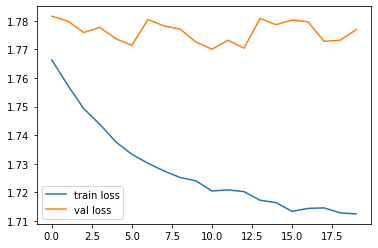

<Figure size 432x288 with 0 Axes>

In [48]:
# plot the loss
plt.plot(res.history['loss'], label='train loss')
plt.plot(res.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

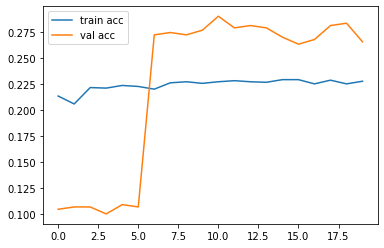

<Figure size 432x288 with 0 Axes>

In [49]:
# plot the accuracy
plt.plot(res.history['acc'], label='train acc')
plt.plot(res.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
model.save('GCP1.h5')

In [40]:
!tar -zcvf image-classification-model1_new.tgz GCP1.h5

GCP1.h5


In [41]:
ls -1

data/
GCP1.h5
image-classification-model1_new.tgz


In [42]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 25.1 MB/s eta 0:00:01


In [43]:
# Replace the credentials that you get from Watson Machine Learing service
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    'url': "https://us-south.ml.cloud.ibm.com",
                    'apikey':"d5FUVqk-IEUWPIQspD9ThlvrBIB5_cgG3A8IAvx6Jysf"}
client = APIClient(wml_credentials)

In [44]:
client = APIClient(wml_credentials)

In [45]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [46]:
space_uid = guid_from_space_name(client, 'imageclassification')
print(" Space UID = " + space_uid)

 Space UID = 766fc10e-a315-4456-b6f3-1322be4ae672


In [47]:
client.set.default_space(space_uid)

'SUCCESS'

In [48]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [49]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_2.4-py3.7")
software_space_uid

'65e171d7-72d1-55d9-8ebb-f813d620c9bb'

In [50]:
model_details = client.repository.store_model(model ='image-classification-model1_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid}
                                             )
model_id = client.repository.get_model_uid(model_details)

Note: Warnings!! :  Model type keras_2.2.4 is deprecated. We recommend you use a supported model type. See Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [52]:
model_id


'516ba750-2c52-4338-bc51-718f9f79dd7e'

In [53]:
client.repository.download(model_id,'image-classification-model1_new.tar.gz')

Successfully saved model content to file: 'image-classification-model1_new.tar.gz'


'/home/wsuser/work/image-classification-model1_new.tar.gz'

In [54]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [55]:
model = load_model("GCP1.h5")

In [56]:
y_pred = model.predict(x_test)

In [57]:
import  numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,